In [3]:
import pandas as pd

# Load Raw Dataset
raw_dataset = pd.read_csv("US_Accidents.csv")

raw_dataset.shape

(7728394, 46)

In [4]:
raw_dataset.columns


Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
filtered_df = raw_dataset[raw_dataset['State'] == 'CA']
del raw_dataset

filtered_df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [8]:
lst =['Source','Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng','Description', 'Airport_Code','Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight',"ID","Street","Country","Timezone"]
filtered_df = filtered_df.drop(lst, axis =1 )
filtered_df.shape

(1741433, 18)

In [9]:
filtered_df.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Distance(mi)', 'City', 'County',
       'State', 'Zipcode', 'Weather_Timestamp', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition'],
      dtype='object')

In [10]:
filtered_df.drop_duplicates(inplace=True)
filtered_df.shape

(1716004, 18)

In [11]:
filtered_df.isnull().sum()

Severity                  0
Start_Time                0
End_Time                  0
Distance(mi)              0
City                     11
County                    0
State                     0
Zipcode                 587
Weather_Timestamp     31974
Temperature(F)        44904
Wind_Chill(F)        507376
Humidity(%)           47239
Pressure(in)          36246
Visibility(mi)        39210
Wind_Direction        45102
Wind_Speed(mph)      161392
Precipitation(in)    561182
Weather_Condition     38853
dtype: int64

In [12]:
# Count BEFORE dropping
print("Before dropping:")
num_rows_with_10_or_more_nans = (filtered_df.isna().sum(axis=1) >= 10).sum()
print(f"Rows with 10 or more missing values: {num_rows_with_10_or_more_nans}")

# Drop rows
before = filtered_df.shape[0]
filtered_df = filtered_df[filtered_df.isna().sum(axis=1) < 10]
after = filtered_df.shape[0]
print(f"Dropped {before - after} rows.")



Before dropping:
Rows with 10 or more missing values: 31974
Dropped 31974 rows.


In [13]:
num_rows_with_10_or_more_nans = (filtered_df.isna().sum(axis=1) >= 10).sum()
print(f"Rows with 10 or more missing values: {num_rows_with_10_or_more_nans}")

Rows with 10 or more missing values: 0


In [15]:
filtered_df.isnull().sum()

Severity                  0
Start_Time                0
End_Time                  0
Distance(mi)              0
City                     11
County                    0
State                     0
Zipcode                   0
Weather_Timestamp         0
Temperature(F)        12930
Wind_Chill(F)        475402
Humidity(%)           15265
Pressure(in)           4272
Visibility(mi)         7236
Wind_Direction        13128
Wind_Speed(mph)      129418
Precipitation(in)    529208
Weather_Condition      6879
dtype: int64

In [16]:
filtered_df.dtypes

Severity               int64
Start_Time            object
End_Time              object
Distance(mi)         float64
City                  object
County                object
State                 object
Zipcode               object
Weather_Timestamp     object
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction        object
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition     object
dtype: object

In [17]:
columns_with_missing = [
    "Temperature(F)",
    "Wind_Chill(F)",
    "Humidity(%)",
    "Pressure(in)",
    "Visibility(mi)",
    "Wind_Speed(mph)",
    "Precipitation(in)"
]

for column in  columns_with_missing:
    print(f"Column: {column} \n     ")
    print(filtered_df[column].skew())
    print(filtered_df[column].mode()[0])
    print(filtered_df[column].value_counts().head(5))
    print(filtered_df[column].nunique())




Column: Temperature(F) 
     
0.2896712318460672
59.0
Temperature(F)
59.0    59228
57.0    53726
63.0    53621
61.0    52234
64.0    50815
Name: count, dtype: int64
570
Column: Wind_Chill(F) 
     
0.14002762101183525
57.0
Wind_Chill(F)
57.0    42273
63.0    40823
59.0    40301
61.0    39186
54.0    38768
Name: count, dtype: int64
402
Column: Humidity(%) 
     
-0.27247714219861524
93.0
Humidity(%)
93.0     45795
100.0    45098
83.0     34859
72.0     33146
78.0     32415
Name: count, dtype: int64
100
Column: Pressure(in) 
     
-3.89595011778934
29.91
Pressure(in)
29.91    36632
29.94    35999
29.88    35700
29.96    35507
29.90    33619
Name: count, dtype: int64
834
Column: Visibility(mi) 
     
4.889722636817508
10.0
Visibility(mi)
10.0    1308974
9.0       61957
7.0       58321
8.0       51261
6.0       40813
Name: count, dtype: int64
63
Column: Wind_Speed(mph) 
     
23.30945001852785
0.0
Wind_Speed(mph)
0.0    315355
3.0    141590
5.0    126715
6.0    109110
7.0     94551
Name: c

In [18]:
# Filling NaN categorical data
filtered_df["City"].fillna(filtered_df["City"].mode()[0],inplace = True)
filtered_df["Weather_Condition"].fillna(filtered_df["Weather_Condition"].mode()[0],inplace = True)
filtered_df["Wind_Direction"].fillna(filtered_df["Wind_Direction"].mode()[0],inplace = True)


# Filling Nan Numerical Data
filtered_df["Temperature(F)"].fillna(filtered_df["Temperature(F)"].median(),inplace = True)
filtered_df["Wind_Chill(F)"].fillna(filtered_df["Wind_Chill(F)"].mean(),inplace = True)
filtered_df["Humidity(%)"].fillna(filtered_df["Humidity(%)"].median(),inplace = True)
filtered_df["Pressure(in)"].fillna(filtered_df["Pressure(in)"].median(),inplace = True)
filtered_df["Wind_Speed(mph)"].fillna(filtered_df["Wind_Speed(mph)"].median(),inplace = True)
filtered_df["Visibility(mi)"].fillna(filtered_df["Visibility(mi)"].mode()[0],inplace = True)
filtered_df["Precipitation(in)"].fillna(filtered_df["Precipitation(in)"].mode()[0],inplace = True)


filtered_df["Zipcode"] = filtered_df["Zipcode"].astype(str).str[:5]
filtered_df["Zipcode"] = filtered_df["Zipcode"].astype(int)


In [20]:
filtered_df.isnull().sum()

Severity             0
Start_Time           0
End_Time             0
Distance(mi)         0
City                 0
County               0
State                0
Zipcode              0
Weather_Timestamp    0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
dtype: int64

In [21]:
filtered_df.dtypes

Severity               int64
Start_Time            object
End_Time              object
Distance(mi)         float64
City                  object
County                object
State                 object
Zipcode                int64
Weather_Timestamp     object
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction        object
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition     object
dtype: object

In [258]:
filtered_df.dtypes

Severity               int64
Start_Time            object
End_Time              object
Distance(mi)         float64
City                  object
County                object
State                 object
Zipcode                int64
Weather_Timestamp     object
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction        object
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition     object
dtype: object

In [22]:
list = ["Weather_Timestamp","State"]
filtered_df = filtered_df.drop(list, axis =1 )


In [23]:
filtered_df.dtypes

Severity               int64
Start_Time            object
End_Time              object
Distance(mi)         float64
City                  object
County                object
Zipcode                int64
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction        object
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition     object
dtype: object

In [36]:
filtered_df["Zipcode"].nunique()

1652

In [33]:
(filtered_df["City"].value_counts()<450).sum()

# Step 1: Get frequency of each city
city_counts = filtered_df['City'].value_counts()

# Step 2: Define a threshold (e.g., keep only cities with >= 100 incidents)
threshold = 450
common_cities = city_counts[city_counts >= threshold].index

# Step 3: Replace rare cities with "Other"
filtered_df['City'] = filtered_df['City'].apply(lambda x: x if x in common_cities else 'Other')


In [45]:
filtered_df['Zipcode_Group'] = filtered_df['Zipcode'].astype(str).str[:3]

filtered_df["Zipcode_Group"].nunique()

58

In [46]:
filtered_df = pd.get_dummies(filtered_df, columns=['City',"County",'Wind_Direction',"Weather_Condition","Zipcode_Group"])
filtered_df.shape

(1684030, 715)

In [47]:
print(filtered_df.select_dtypes(exclude='bool').dtypes.to_string())
num_non_bool_cols = filtered_df.select_dtypes(exclude='bool').shape[1]
print(f"Number of columns (excluding bool): {num_non_bool_cols}")



Severity               int64
Start_Time            object
End_Time              object
Distance(mi)         float64
Zipcode                int64
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Speed(mph)      float64
Precipitation(in)    float64
Number of columns (excluding bool): 12


In [48]:
filtered_df["Start_Time"] = pd.to_datetime(filtered_df["Start_Time"], errors='coerce')
filtered_df["End_Time"] = pd.to_datetime(filtered_df["End_Time"], errors='coerce')

In [49]:
filtered_df["Date"] = pd.to_datetime(filtered_df["Start_Time"].dt.date)
filtered_df["day_of_week"] = filtered_df["Start_Time"].dt.dayofweek
filtered_df["Hour"] = filtered_df["Start_Time"].dt.hour
filtered_df["Minute"] = filtered_df["Start_Time"].dt.minute
filtered_df["Duration_minutes"] = (filtered_df["End_Time"] - filtered_df["Start_Time"]).dt.total_seconds() / 60




In [50]:
print(filtered_df.select_dtypes(exclude='bool').dtypes.to_string())
num_non_bool_cols = filtered_df.select_dtypes(exclude='bool').shape[1]
print(f"Number of columns (excluding bool): {num_non_bool_cols}")

Severity                      int64
Start_Time           datetime64[ns]
End_Time             datetime64[ns]
Distance(mi)                float64
Zipcode                       int64
Temperature(F)              float64
Wind_Chill(F)               float64
Humidity(%)                 float64
Pressure(in)                float64
Visibility(mi)              float64
Wind_Speed(mph)             float64
Precipitation(in)           float64
Date                 datetime64[ns]
day_of_week                 float64
Hour                        float64
Minute                      float64
Duration_minutes            float64
Number of columns (excluding bool): 17


In [51]:
filtered_df.isnull().sum()

Severity                 0
Start_Time          169924
End_Time            169924
Distance(mi)             0
Zipcode                  0
                     ...  
Date                169924
day_of_week         169924
Hour                169924
Minute              169924
Duration_minutes    169924
Length: 720, dtype: int64

In [52]:
filtered_df["Month"] = filtered_df["Date"].dt.month
filtered_df = filtered_df.dropna()

filtered_df["Hour"] = filtered_df["Hour"].astype(int)

In [53]:
filtered_df.drop("Start_Time",axis =1, inplace =True)
filtered_df.drop("End_Time",axis =1, inplace =True)


In [54]:
import holidays
us_holidays = holidays.US()

# Create a new boolean column: 1 if holiday, else 0
filtered_df['Is_Holiday'] = filtered_df['Date'].apply(lambda date: 1 if date in us_holidays else 0)



In [55]:
filtered_df['Hour'].nunique()

24

In [56]:
filtered_df['Is_Rush_Hour'] = filtered_df['Hour'].apply(lambda hour: 1 if (7<=hour<=9) or (16<=hour<=19) else 0)



In [63]:
filtered_df['Is_Rush_Hour'].value_counts()
pd.set_option('display.max_rows', 20)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

In [64]:
filtered_df.isnull().sum()

Severity            0
Distance(mi)        0
Zipcode             0
Temperature(F)      0
Wind_Chill(F)       0
                   ..
Minute              0
Duration_minutes    0
Month               0
Is_Holiday          0
Is_Rush_Hour        0
Length: 721, dtype: int64

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


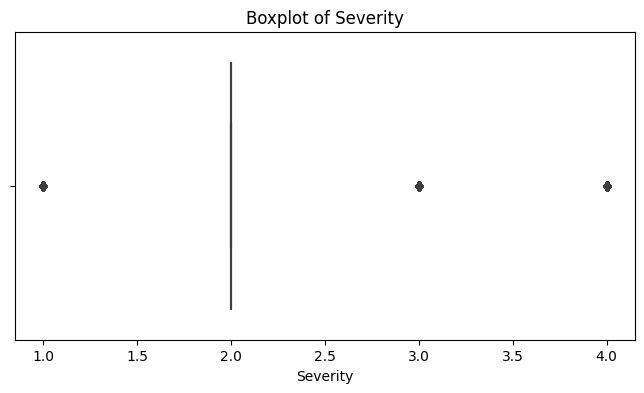

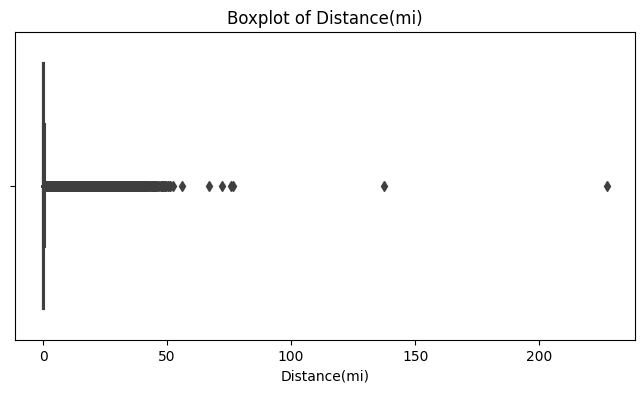

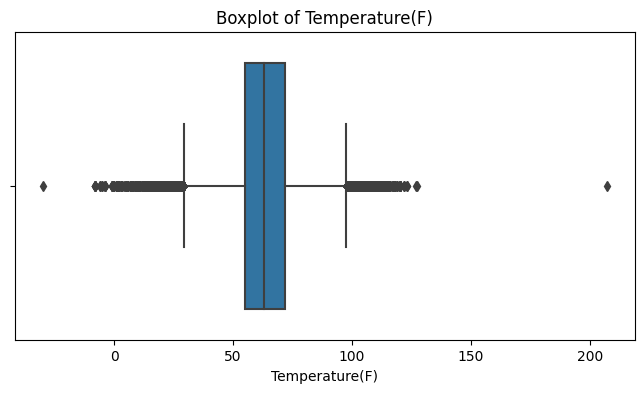

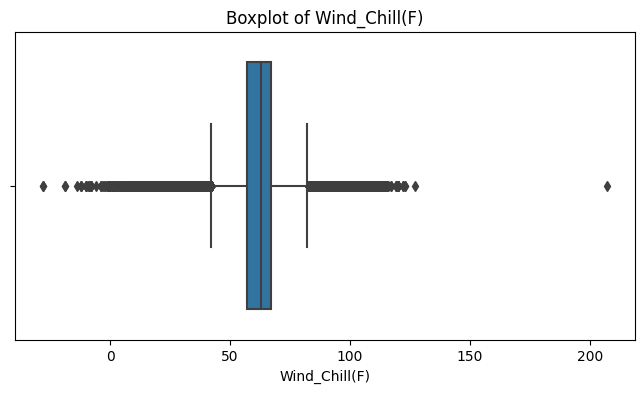

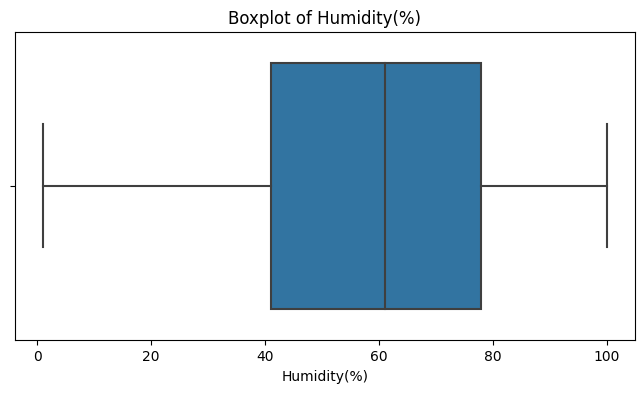

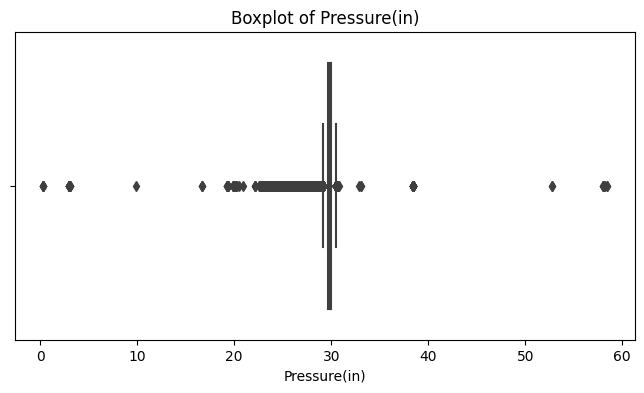

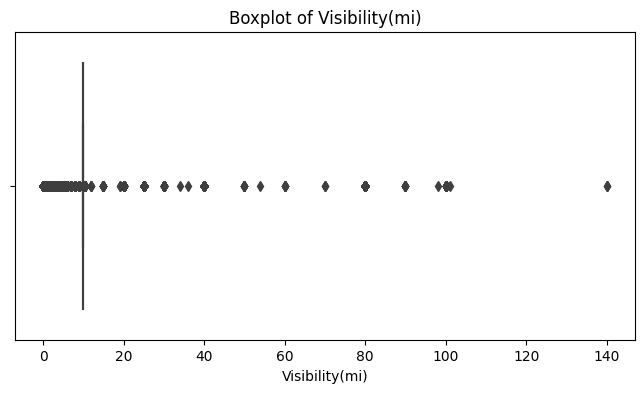

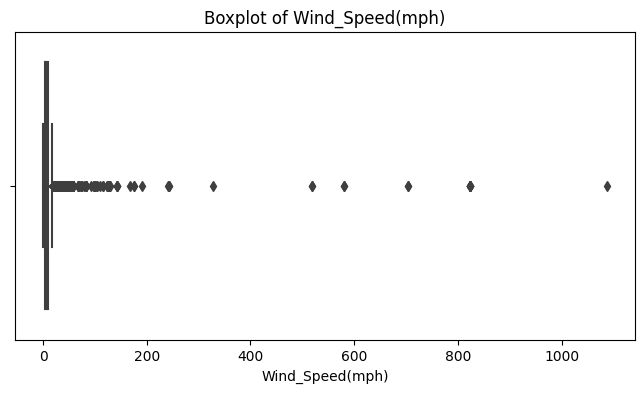

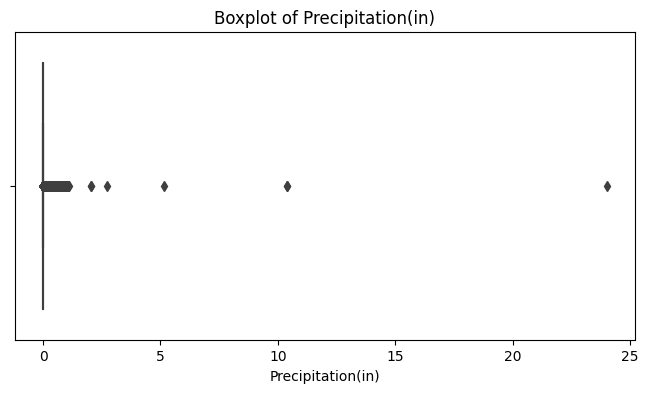

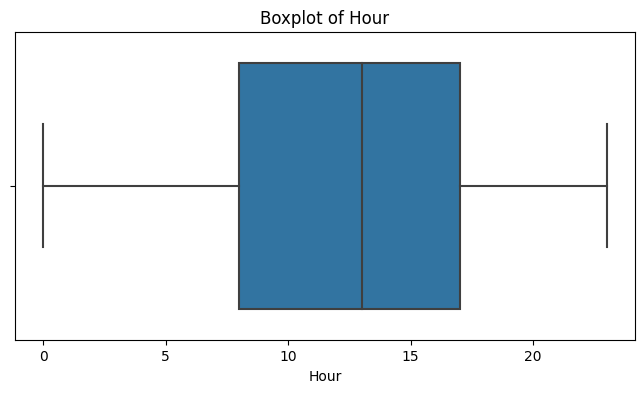

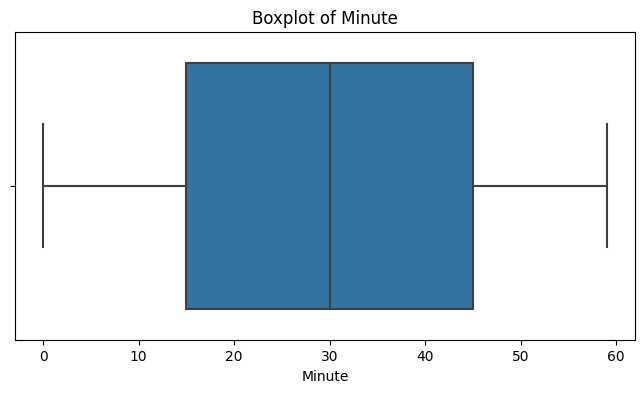

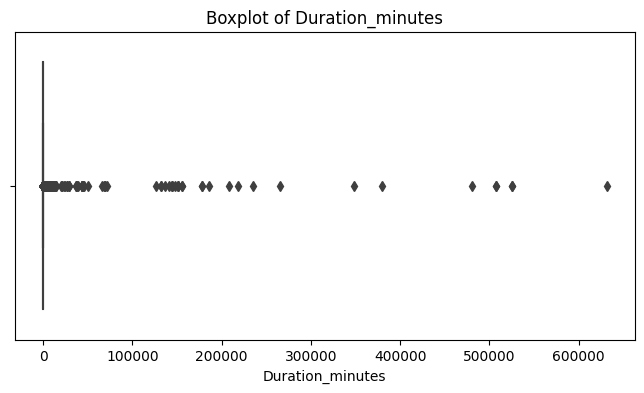

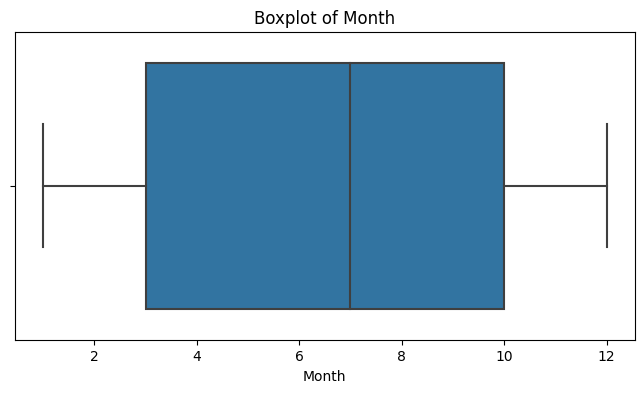

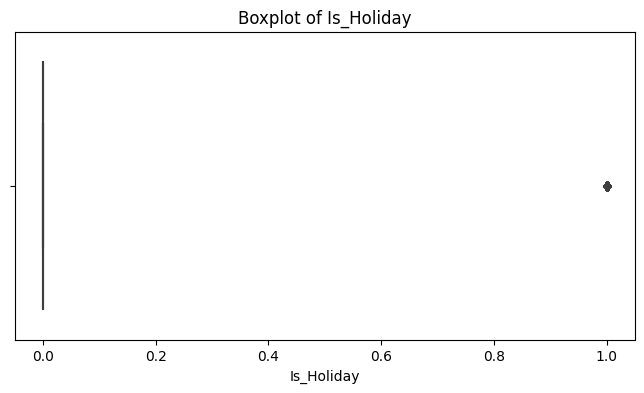

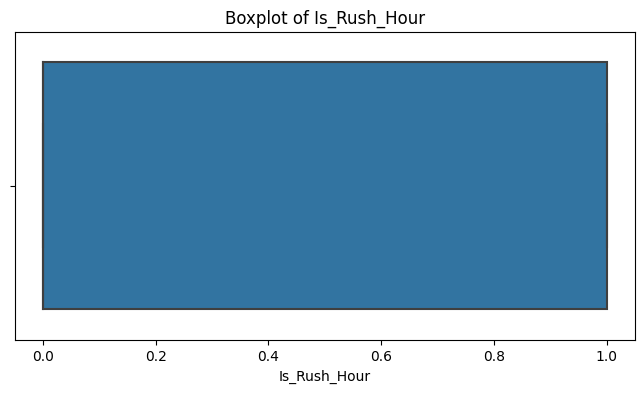

In [68]:
numeric_cols = ['Severity', 'Distance(mi)',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Hour',
       'Minute', 'Duration_minutes', 'Month', 'Is_Holiday', 'Is_Rush_Hour']  # example
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=filtered_df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [217]:
filtered_df.columns

Index(['Severity', 'Distance(mi)', 'City', 'County', 'Zipcode',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Date', 'day_of_week', 'Hour',
       'Minute', 'Duration_minutes', 'Month', 'Is_Holiday', 'Is_Rush_Hour'],
      dtype='object')

In [233]:
filtered_df = filtered_df[filtered_df['Wind_Chill(F)'] < 200]
(filtered_df["Wind_Chill(F)"]>200).sum()

0

In [70]:
pd.set_option('display.max_rows', None)  # Show all rows

filtered_df.dtypes

Severity                                                   int64
Distance(mi)                                             float64
Zipcode                                                    int64
Temperature(F)                                           float64
Wind_Chill(F)                                            float64
Humidity(%)                                              float64
Pressure(in)                                             float64
Visibility(mi)                                           float64
Wind_Speed(mph)                                          float64
Precipitation(in)                                        float64
City_Acampo                                                 bool
City_Acton                                                  bool
City_Agoura Hills                                           bool
City_Alamo                                                  bool
City_Alhambra                                               bool
City_Alta                

In [71]:
cols_to_standardize = [
    "Distance(mi)", "Temperature(F)", "Wind_Chill(F)", "Humidity(%)",
    "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)",
    "Hour", "Minute", "Duration_minutes"
]

filtered_df.drop("Date",axis =1,inplace = True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_df[cols_to_standardize])

scaled_df = pd.DataFrame(scaled_data, columns=cols_to_standardize)

final_df = pd.concat([scaled_df, filtered_df.drop(columns=cols_to_standardize).reset_index(drop=True)], axis=1)


In [72]:
pd.set_option('display.max_rows', None)  # Show all rows

filtered_df.dtypes
final_df.to_csv("test_1.csv")

In [75]:
final_df.dtypes


Distance(mi)                                      float64
Temperature(F)                                    float64
Wind_Chill(F)                                     float64
Humidity(%)                                       float64
Pressure(in)                                      float64
Visibility(mi)                                    float64
Wind_Speed(mph)                                   float64
Hour                                              float64
Minute                                            float64
Duration_minutes                                  float64
Severity                                            int64
Zipcode                                             int64
Precipitation(in)                                 float64
City_Acampo                                          bool
City_Acton                                           bool
City_Agoura Hills                                    bool
City_Alamo                                           bool
City_Alhambra 